In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
day.shape 


(730, 16)

In [7]:
day.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [8]:
day.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [9]:
day.season.sample(10)

132    2
484    2
22     1
240    3
597    3
190    3
704    4
337    4
381    1
37     1
Name: season, dtype: int64

Checking the value count of each Feature

In [10]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
day.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [12]:
day.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
day.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [15]:
day.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [16]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
day.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [18]:
day.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64

In [19]:
day.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [20]:
day.windspeed.value_counts()

7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

In [21]:
day.casual.value_counts()

968     4
120     4
639     3
653     3
163     3
       ..
1639    1
616     1
620     1
1278    1
1488    1
Name: casual, Length: 605, dtype: int64

In [22]:
day.registered.value_counts()

1707    3
6248    3
4841    3
3461    2
5265    2
       ..
2720    1
670     1
1693    1
4763    1
4097    1
Name: registered, Length: 678, dtype: int64

In [23]:
day.cnt.value_counts()

5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

In [24]:
day.drop(['instant', 'dteday','atemp'], axis=1, inplace=True)

#Find out the number of unique values for all categorical variables 

for col in loan.select_dtypes("object").columns:
    print (col, loan[col].nunique())

In [25]:
day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Univariate analysis for numerical features

In [26]:
def numhist(variable, bins):
    plt.figure(figsize=(20,10))
    plt.hist(day[variable], bins=bins, edgecolor='black', linewidth=1.2, color="gray")
    plt.title("Distribution of " + variable, fontsize=30)
    plt.xlabel(variable, fontsize=20)
    plt.ylabel("cnt", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

Registered 

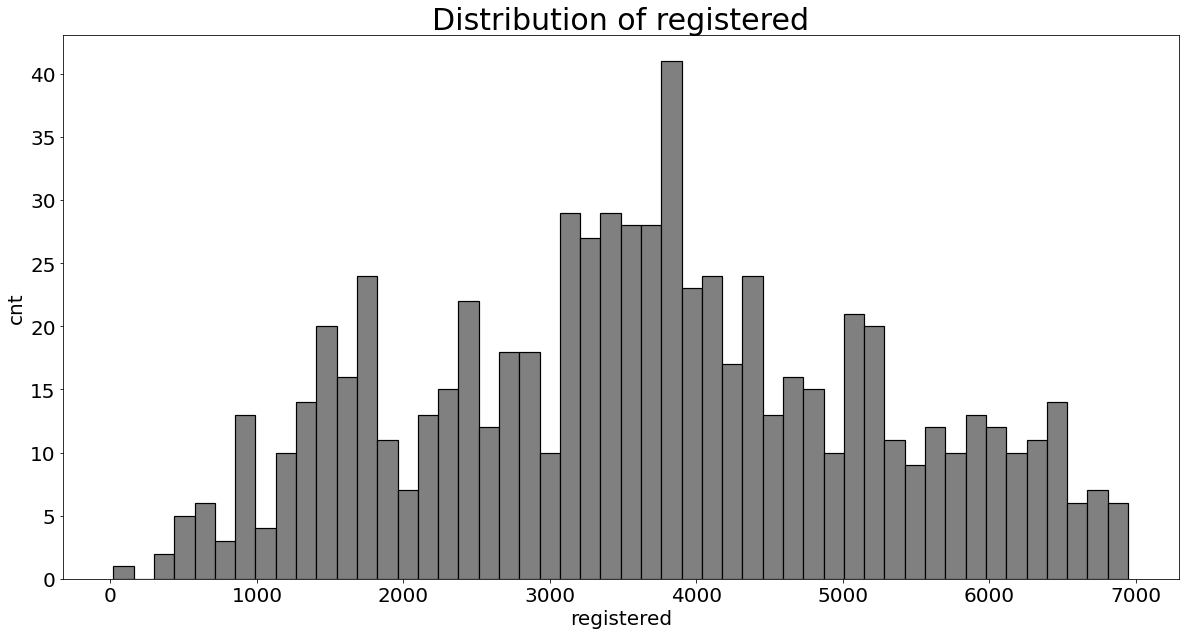

In [27]:
numhist("registered", 50)

casual

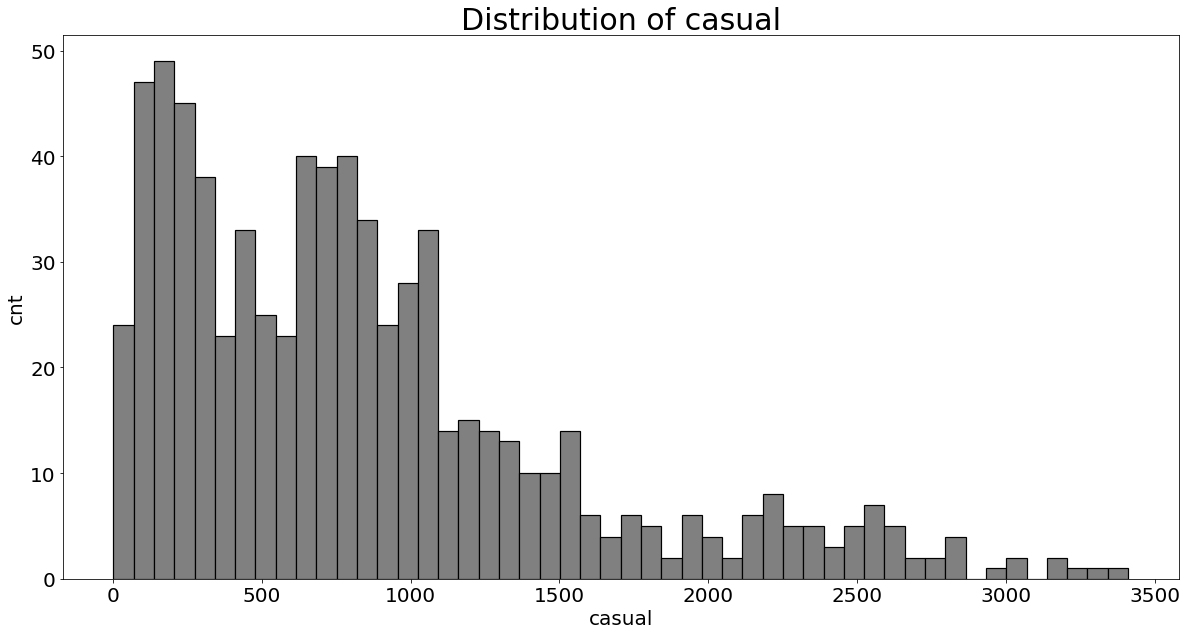

In [28]:
numhist("casual", 50)

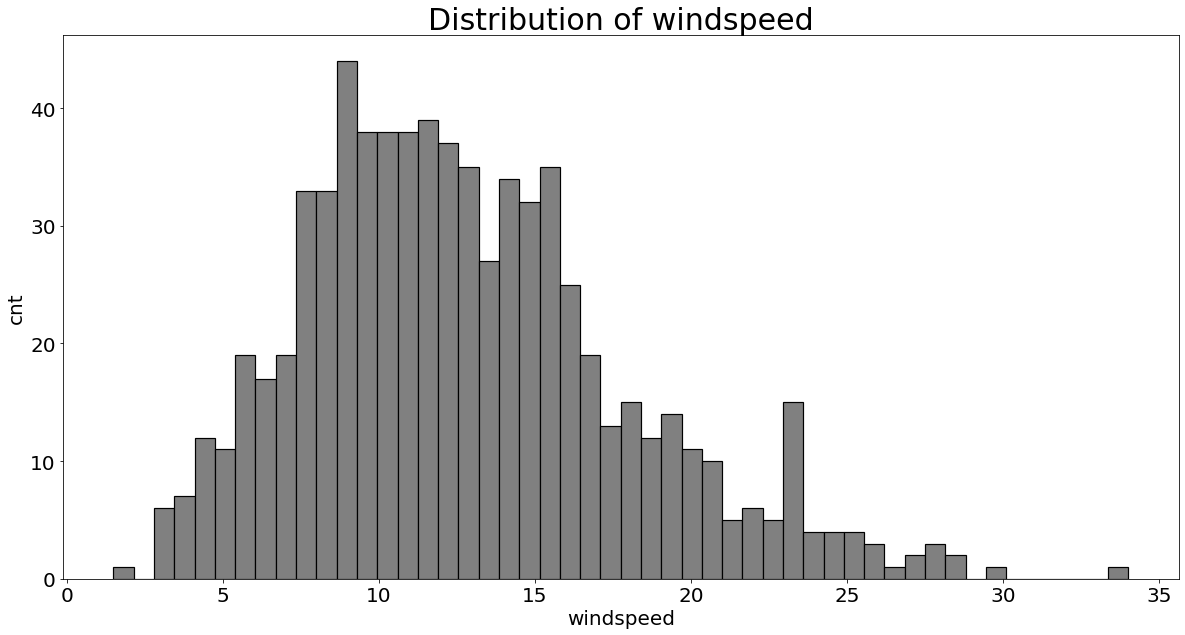

In [29]:
numhist("windspeed", 50)

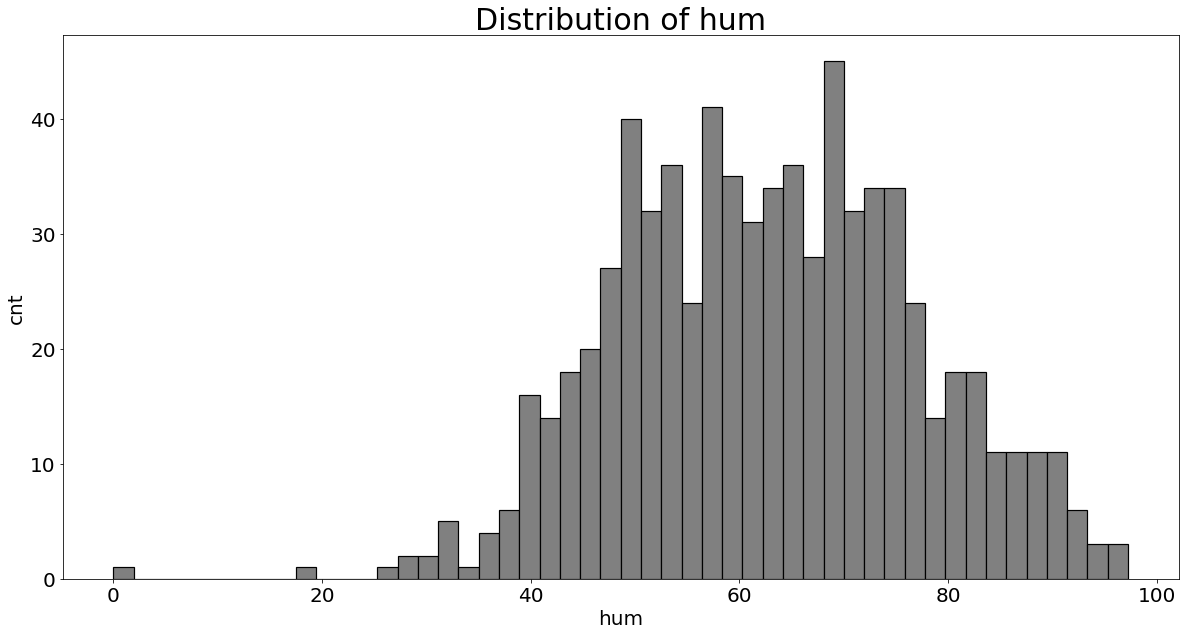

In [30]:
numhist("hum", 50)

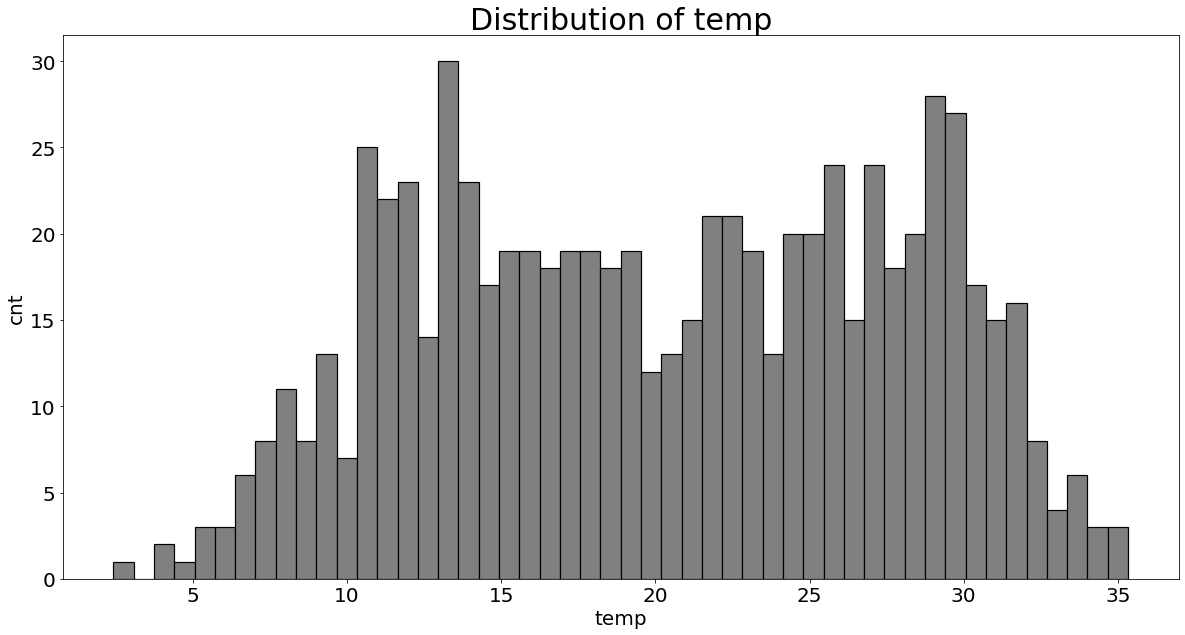

In [31]:
numhist("temp", 50)

weathersit

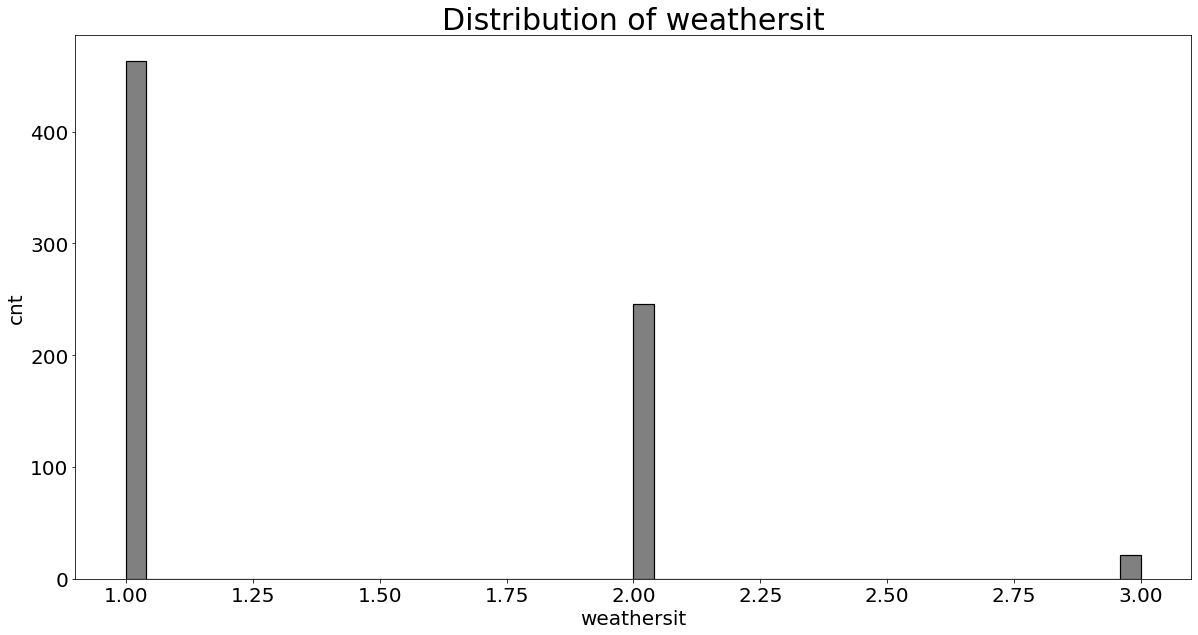

In [32]:
numhist("weathersit", 50)

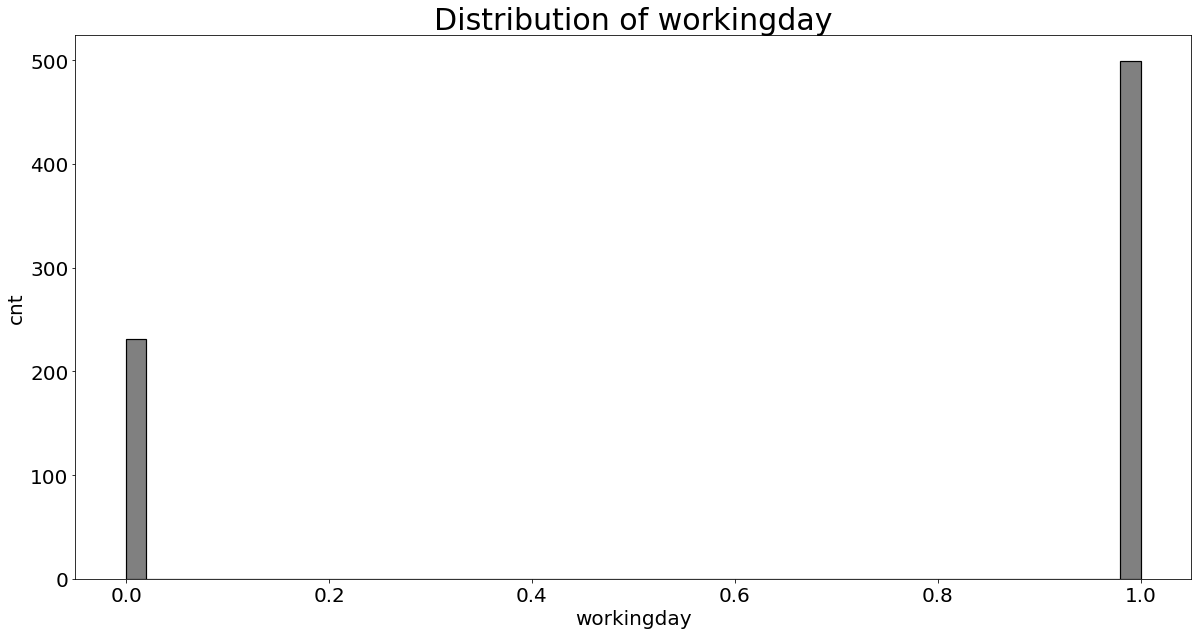

In [33]:
numhist("workingday", 50)

weekday

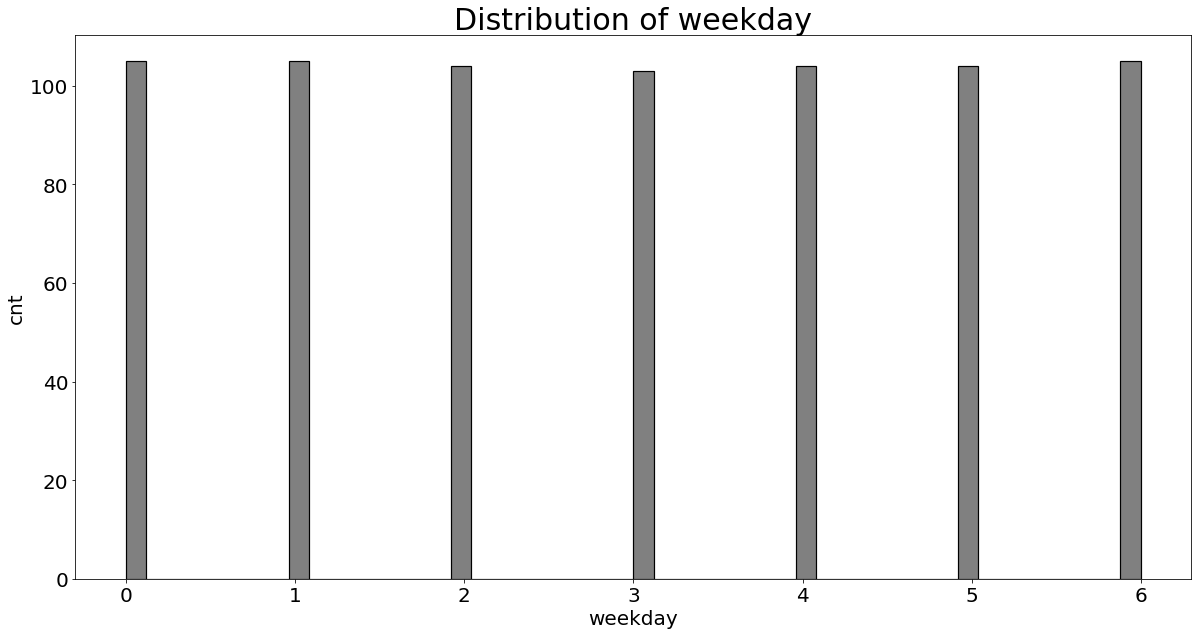

In [34]:
numhist("weekday", 50)

holiday

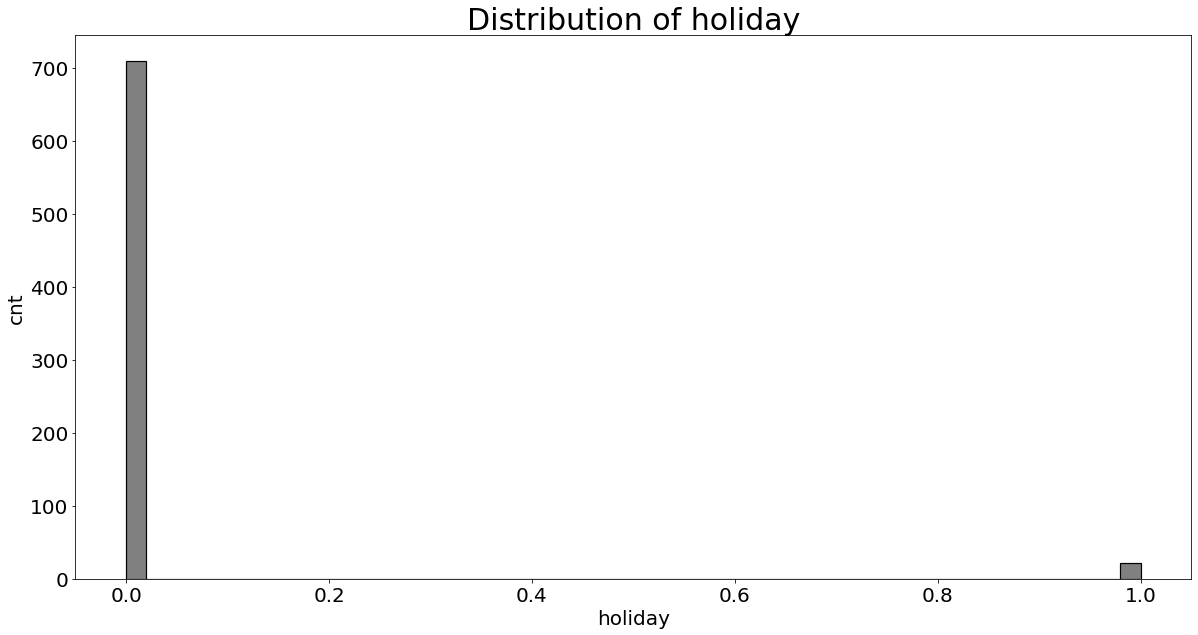

In [35]:
numhist("holiday", 50)

mnth

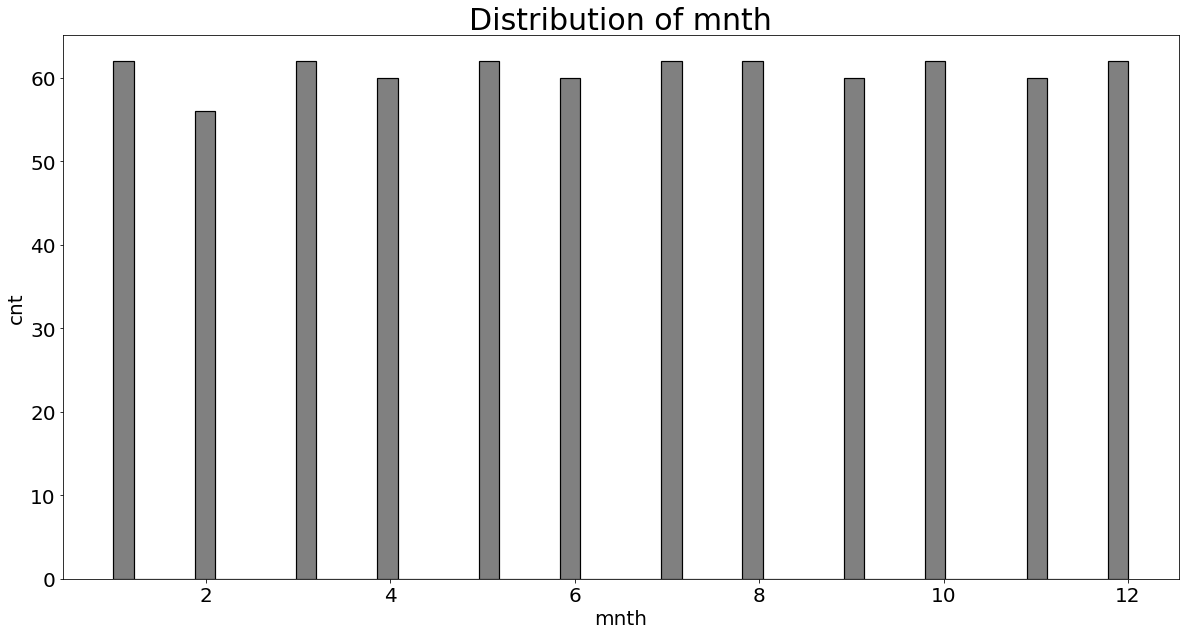

In [36]:
numhist("mnth", 50)

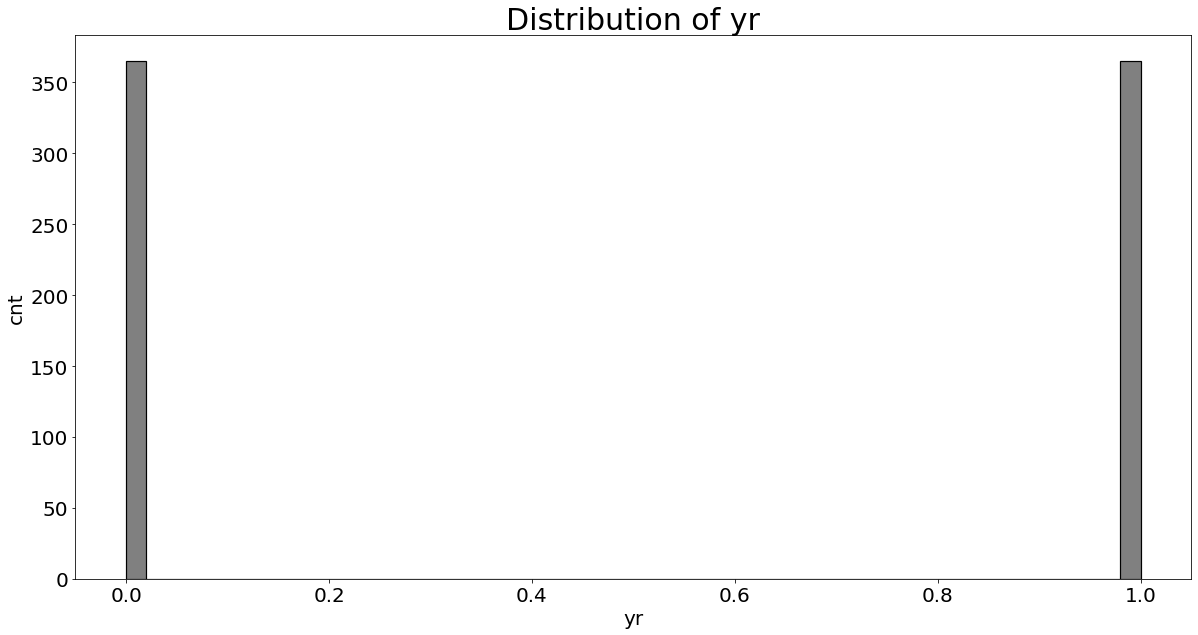

In [37]:
numhist("yr", 50)

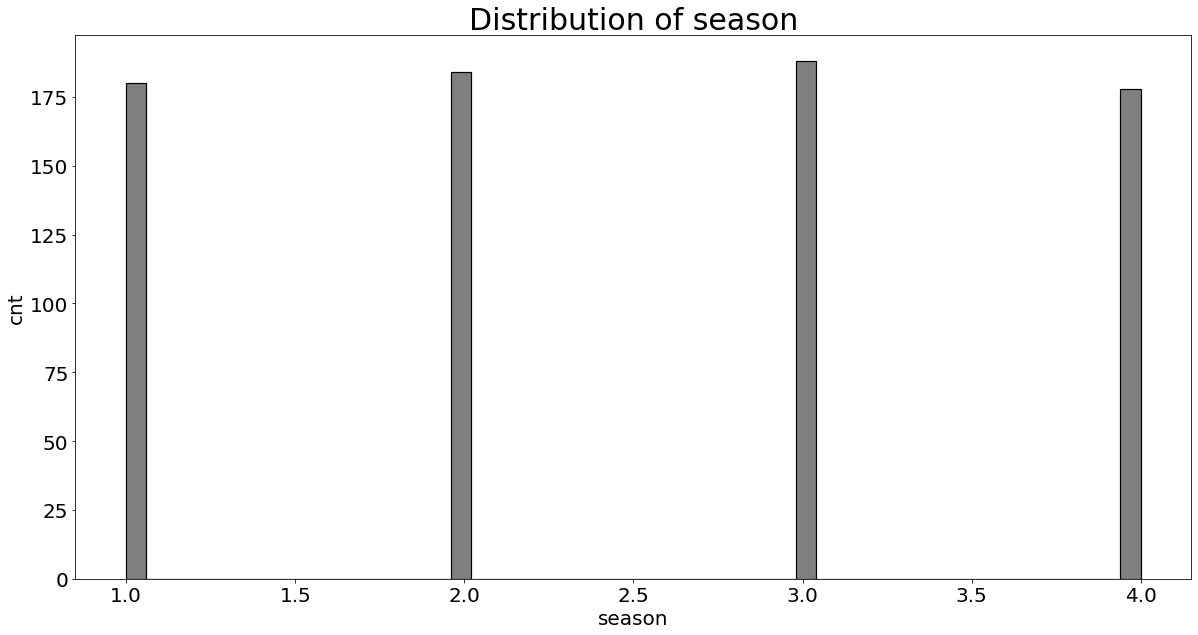

In [38]:
numhist("season", 50)

Step 2: Visualising the Data



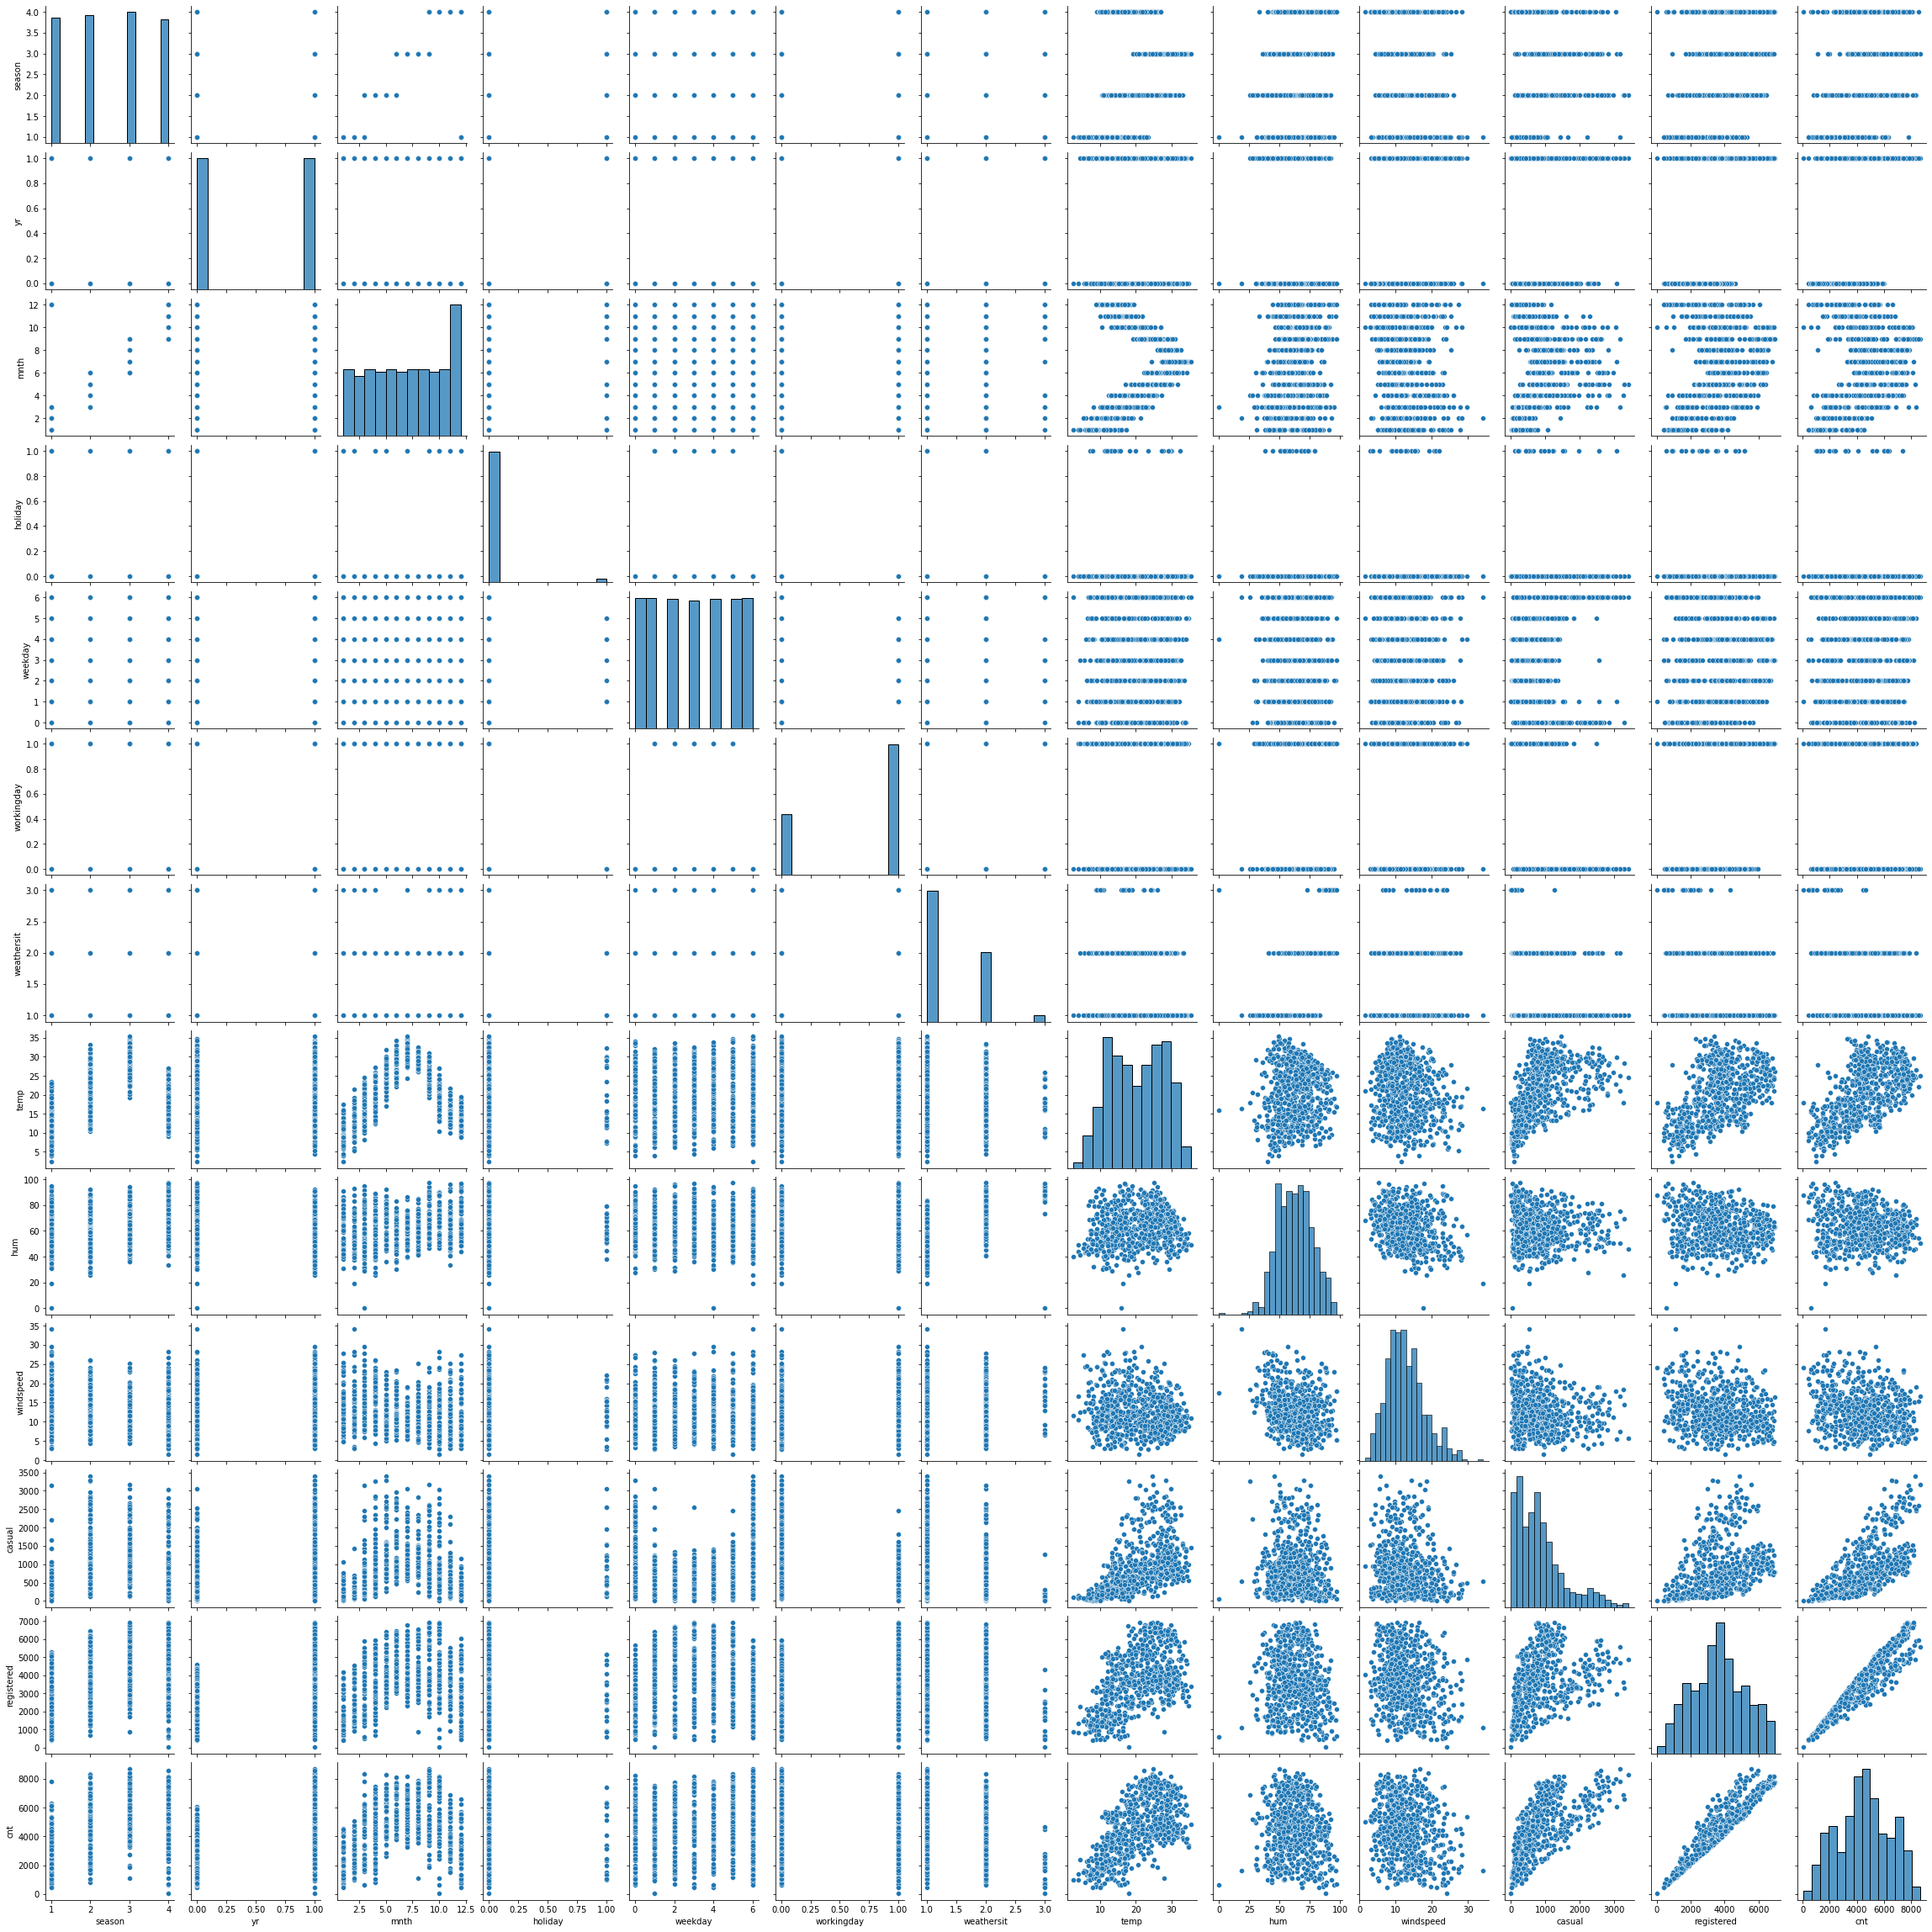

In [39]:
sns.pairplot(day)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression 


In [41]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

Visualising Categorical Variables

Step 3: Data Preparation

In [42]:
day = day.replace({"weathersit": {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}})

In [43]:
day.weathersit.sample(5)

485     Mist
208    Clear
14      Mist
180    Clear
384     Mist
Name: weathersit, dtype: object

In [44]:
day = day.replace({"season": {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}})

Visualising Categorical Variables

In [45]:
day.season.sample(10)

205      Fall
89     Summer
523    Summer
393    Spring
394    Spring
340    Winter
412    Spring
204      Fall
114    Summer
524    Summer
Name: season, dtype: object

Dummy Variables

In [46]:
status = pd.get_dummies(day['season'])

In [47]:
status.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [48]:
status1 = pd.get_dummies(day['weathersit'])

In [49]:
status1.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [50]:
status = pd.get_dummies(day['season'], drop_first = True)

In [51]:
status1 = pd.get_dummies(day['weathersit'], drop_first = True)

In [52]:
day = pd.concat([day, status], axis = 1)

In [53]:
day = pd.concat([day, status1], axis = 1)

In [54]:
day.head().sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Light Snow,Mist
2,Spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,0
0,Spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,1
3,Spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,0
1,Spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,1


In [55]:
day.drop(['season'], axis = 1, inplace = True)

In [56]:
day.drop(['weathersit'], axis = 1, inplace = True)

In [57]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Light Snow,Mist
0,0,1,0,6,0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,0


Step 4: Splitting the Data into Training and Testing Sets


In [58]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Light Snow,Mist
653,1,10,0,2,1,19.201653,55.8333,12.208807,0.280402,0.951776,0.864243,0,0,1,0,0
576,1,7,0,2,1,29.246653,70.4167,11.083475,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,3,0,6,0,16.980847,62.1250,10.792293,0.290765,0.446145,0.465255,1,0,0,0,1
728,1,12,0,0,0,10.489153,48.3333,23.500518,0.110332,0.203869,0.204096,1,0,0,0,0
482,1,4,0,6,0,15.443347,48.9583,8.708325,0.340750,0.444701,0.482973,0,1,0,0,1


In [63]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,2.990196,0.676471,20.102429,63.112926,12.831318,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,3.468714,0.157763,2.017093,0.468282,7.431169,14.156632,5.291832,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,13.606865,52.270825,9.041918,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,20.209597,63.437500,12.083182,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.615847,73.250025,15.750879,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,97.041700,34.000021,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


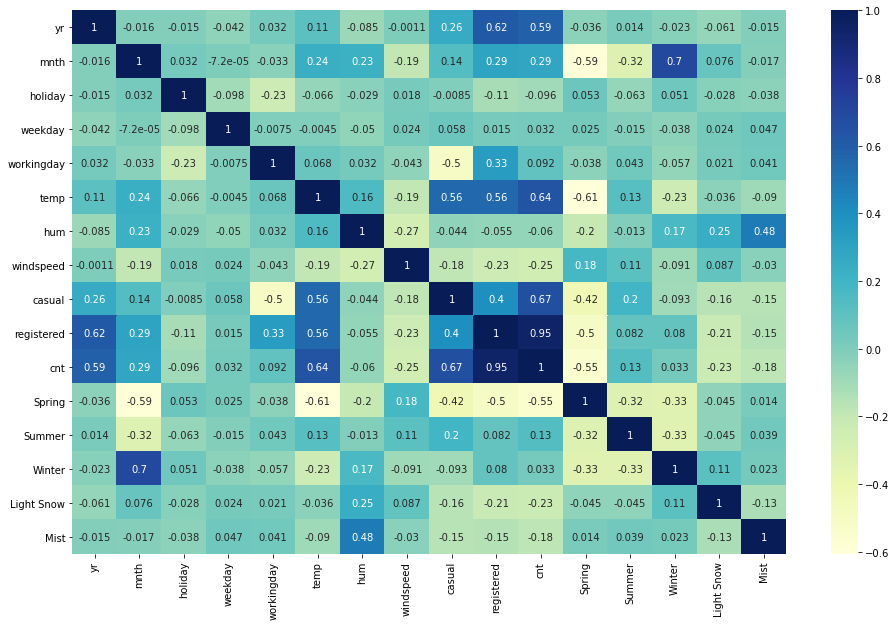

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

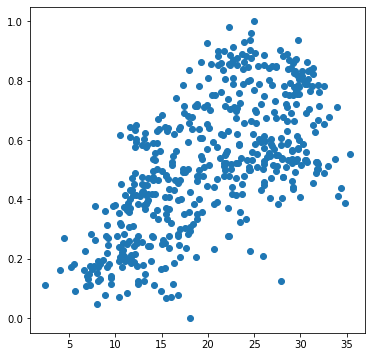

In [65]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

In [72]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['casual']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [73]:
# Check the parameters obtained

lr.params

const     0.327377
casual    0.731337
dtype: float64

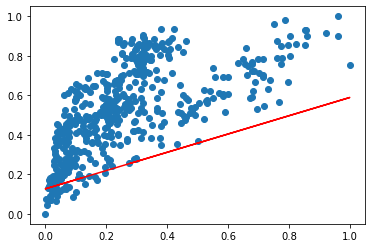

In [74]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [75]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           5.90e-68
Time:                        12:03:02   Log-Likelihood:                 190.96
No. Observations:                 510   AIC:                            -377.9
Df Residuals:                     508   BIC:                            -369.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3274      0.012     27.873      0.0

Adding another variable

In [76]:
day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'Spring', 'Summer',
       'Winter', 'Light Snow', 'Mist'],
      dtype='object')

In [77]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'workingday']]

In [78]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.108789
temp          0.019349
workingday    0.023464
dtype: float64

In [79]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           4.92e-60
Time:                        12:03:05   Log-Likelihood:                 175.88
No. Observations:                 510   AIC:                            -345.8
Df Residuals:                     507   BIC:                            -333.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1088      0.024      4.535      0.0

Adding all the variables to the model

In [80]:
day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'Spring', 'Summer',
       'Winter', 'Light Snow', 'Mist'],
      dtype='object')

In [81]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -4.371503e-16
yr            4.063590e-16
mnth          8.128806e-17
holiday      -5.074066e-17
weekday      -5.259465e-16
workingday    9.150666e-17
temp          2.862294e-17
hum          -3.049319e-19
windspeed     1.962406e-17
casual        3.774735e-01
registered    7.968247e-01
Spring       -8.673617e-19
Summer       -1.440634e-16
Winter       -1.147086e-16
Light Snow   -5.963112e-16
Mist          6.071532e-18
dtype: float64

In [82]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.235e+29
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:03:07   Log-Likelihood:                 16680.
No. Observations:                 510   AIC:                        -3.333e+04
Df Residuals:                     494   BIC:                        -3.326e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.372e-16    7.1e-16     -0.615      0.5

### Checking VIF
 $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [83]:
#check the VIF of each column( >5 shouldn't be ignored, >10 is definately means its related to other variable )
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,registered,43.09
5,temp,37.96
6,hum,31.68
1,mnth,15.96
4,workingday,10.49
8,casual,9.88
7,windspeed,7.40
0,yr,6.03
12,Winter,4.92
10,Spring,4.35


### Dropping the variable and updating the model

In [84]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('registered', 1,)

In [85]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     340.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.30e-243
Time:                        12:03:32   Log-Likelihood:                 641.49
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     495   BIC:                            -1189.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0923      0.032      2.887      0.0

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,32.05
6,hum,31.63
1,mnth,15.74
8,casual,8.96
7,windspeed,7.23
4,workingday,6.54
11,Winter,4.63
9,Spring,4.33
3,weekday,3.27
10,Summer,2.86


In [88]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('temp', 1,)

In [89]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     323.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.17e-232
Time:                        12:03:39   Log-Likelihood:                 611.79
No. Observations:                 510   AIC:                            -1196.
Df Residuals:                     496   BIC:                            -1136.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1873      0.031      5.978      0.0

In [91]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,22.84
1,mnth,15.00
6,windspeed,6.46
7,casual,5.72
4,workingday,4.87
8,Spring,3.28
3,weekday,3.27
10,Winter,3.01
9,Summer,2.50
0,yr,2.41


In [92]:
X = X.drop('hum', 1,)

In [93]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [94]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     350.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.15e-233
Time:                        12:03:41   Log-Likelihood:                 611.78
No. Observations:                 510   AIC:                            -1198.
Df Residuals:                     497   BIC:                            -1143.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1840      0.024      7.548      0.0

In [95]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,11.21
5,windspeed,6.45
6,casual,4.58
4,workingday,4.01
3,weekday,3.27
9,Winter,3.01
0,yr,2.39
7,Spring,2.38
8,Summer,2.24
11,Mist,1.58


In [96]:
X = X.drop('mnth', 1,)

In [97]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     380.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.95e-234
Time:                        12:03:42   Log-Likelihood:                 610.10
No. Observations:                 510   AIC:                            -1196.
Df Residuals:                     498   BIC:                            -1145.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.019     10.806      0.0

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,5.73
2,weekday,3.20
5,casual,3.16
3,workingday,2.97
0,yr,2.37
6,Spring,2.13
7,Summer,1.95
8,Winter,1.76
10,Mist,1.54
9,Light Snow,1.11


In [100]:
X = X.drop('windspeed', 1,)

In [101]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [102]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     408.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.42e-233
Time:                        12:03:44   Log-Likelihood:                 604.21
No. Observations:                 510   AIC:                            -1186.
Df Residuals:                     499   BIC:                            -1140.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1761      0.017     10.457      0.0

In [103]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weekday,3.12
4,casual,2.83
3,workingday,2.61
0,yr,2.36
6,Summer,1.73
5,Spring,1.60
7,Winter,1.60
9,Mist,1.53
8,Light Snow,1.08
1,holiday,1.06


In [104]:
X = X.drop('holiday', 1,)

In [105]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     454.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.84e-234
Time:                        12:03:46   Log-Likelihood:                 603.86
No. Observations:                 510   AIC:                            -1188.
Df Residuals:                     500   BIC:                            -1145.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1796      0.016     11.005      0.0

In [107]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,weekday,3.12
3,casual,2.82
2,workingday,2.57
0,yr,2.36
5,Summer,1.73
4,Spring,1.56
6,Winter,1.56
8,Mist,1.53
7,Light Snow,1.08


In [108]:
X = X.drop('Winter', 1,)

In [109]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [110]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     511.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.59e-235
Time:                        12:03:48   Log-Likelihood:                 603.58
No. Observations:                 510   AIC:                            -1189.
Df Residuals:                     501   BIC:                            -1151.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1863      0.013     13.873      0.0

In [111]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,weekday,3.04
3,casual,2.78
2,workingday,2.45
0,yr,2.34
5,Summer,1.49
7,Mist,1.48
4,Spring,1.41
6,Light Snow,1.05


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Note: At this point I had a dead Kernel. My Notebook stopped working and I don't know why Kernel died.

## Residual Analysis of the train data

In [112]:
import statsmodels.api as sm

In [113]:
#when i tried to chnage lr_4 to lr_2, my Kernel died 
y_train_cnt = lr_2.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Making Predictions Using the Final Model

In [114]:
num_vars = ['weekday', 'casual', 'yr', 'Summer','Light Snow','Spring','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

ValueError: operands could not be broadcast together with shapes (219,7) (3,) (219,7) 

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [ ]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["Mist", "workingday"], axis = 1)

In [ ]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

## Model Evaluatio

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)